# Earth Quake data analysis

Importing warning library for avoiding warning messages

In [23]:
import warnings
warnings.filterwarnings('ignore')

Importing required libraries

In [24]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import requests
import matplotlib.cm as cm

Importing the data set

In [25]:
EQ_df = pd.read_csv(r'D:\vj\programing study material\my portfolio projects\Earth quake\Data set\data.csv')

## Exploratory Data Analysis

In [26]:
EQ_df.head()

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map
0,14-07-2024,12:44:11,Fiji Islands Region,5.1,571,21.51 S,179.32 W,A,-
1,14-07-2024,08:33:00,15 km SW of Lala musa,3.8,18,32.60 N,73.85 E,M,-
2,14-07-2024,07:11:35,"Hindu Kush Region, Afghanistan",3.7,200,36.52 N,70.43 E,M,-
3,14-07-2024,02:11:31,Afghanistan-Tajikistan Border Region,3.7,78,36.03 N,71.58 E,M,-
4,13-07-2024,22:49:35,Xizang,4.5,83,29.88 N,86.80 E,A,-


<b> Data Discription </b><br>
Date: The date when the earthquake event occurred.<br>
Time (utc):The exact time (in Coordinated Universal Time) when the earthquake was recorded.<br>
Region: The geographical region where the earthquake occurred.<br>
Magnitude:The magnitude of the earthquake on the Richter scale.<br>
Depth (km):The depth at which the earthquake occurred.<br>
Latitude:The latitude coordinate of the earthquake epicenter(including the directional indicator 'N' for north or 'S' for south)<br>
Longitude:The longitude coordinate of the earthquake epicenter(including the directional indicator 'E' for east or 'W' for west)<br>
Mode: The mode of the earthquake( 'A' for automatic detection, 'M' for manual verification).<br>

In [6]:
print('Earth quake Data frame contains', EQ_df.shape[0],'rows',EQ_df.shape[1],'columns')

Earth quake Data frame contains 14741 rows 9 columns


In [7]:
EQ_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Magnitude,14741.0,4.464914,1.048688,0.7,3.7,4.6,5.2,37.0
Depth (km),14741.0,94.527440,116.198027,0.0,11.0,60.0,134.0,3654.0


In [8]:
EQ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        14741 non-null  object 
 1   Time (utc)  14741 non-null  object 
 2   Region      14741 non-null  object 
 3   Magnitude   14741 non-null  float64
 4   Depth (km)  14741 non-null  int64  
 5   Latitude    14741 non-null  object 
 6   Longitude   14741 non-null  object 
 7   Mode        14741 non-null  object 
 8   Map         14613 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


In the dataframe date was in Object type, so we are converting it to date format for further analysis

In [27]:
EQ_df['Date'] = pd.to_datetime(EQ_df['Date'])
print('Data frame min date is', min(EQ_df['Date']),'and max date is',max(EQ_df['Date']))

Data frame min date is 2015-04-12 00:00:00 and max date is 2024-12-07 00:00:00


Finding any null value present in the data set

In [10]:
EQ_df.isnull().sum()

Date            0
Time (utc)      0
Region          0
Magnitude       0
Depth (km)      0
Latitude        0
Longitude       0
Mode            0
Map           128
dtype: int64

In [11]:
EQ_df.Map.value_counts()

-    14613
Name: Map, dtype: int64

In [28]:
# There is no vale in MAP colum, so we are removing it
EQ_df.drop(columns=['Map'], axis = 1, inplace = True)

Creating a new column for time delta, finding the insights based on the hour earth quake occured

In [29]:
# user defined function for creating hours colum

def in_between_time(time):
    temp = datetime.strptime(time,'%H:%M:%S').time()
    
    if temp.hour == 0:
        return('0AM - 1AM')
    elif temp.hour == 1:
        return('1AM - 2AM')
    elif temp.hour == 2:
        return('2AM - 3AM')
    elif temp.hour == 3:
        return('3AM - 4AM')
    elif temp.hour == 4:
        return('4AM - 5AM')
    elif temp.hour == 5:
        return('5AM - 6AM')
    elif temp.hour == 6:
        return('6AM - 7AM')
    elif temp.hour == 7:
        return('7AM - 8AM')
    elif temp.hour == 8:
        return('8AM - 9AM')
    elif temp.hour == 9:
        return('9AM - 10AM')
    elif temp.hour == 10:
        return('10AM - 11AM')
    elif temp.hour == 11:
        return('11AM - 12PM')
    elif temp.hour == 12:
        return('12PM - 13PM')
    elif temp.hour == 13:
        return('13PM - 14PM')
    elif temp.hour == 14:
        return('14PM - 15PM')
    elif temp.hour == 15:
        return('15PM - 16PM')
    elif temp.hour == 16:
        return('16PM - 17PM')
    elif temp.hour == 17:
        return('17PM - 18PM')
    elif temp.hour == 18:
        return('18PM - 19PM')
    elif temp.hour == 19:
        return('19PM - 20PM')
    elif temp.hour == 20:
        return('20PM - 21PM')
    elif temp.hour == 21:
        return('21PM - 22PM')
    elif temp.hour == 22:
        return('22PM - 23PM')
    elif temp.hour == 23:
        return('23PM - 0AM')

EQ_df['hours'] =  np.vectorize(in_between_time)(EQ_df['Time (utc)'])

Column 'Latitude' and 'Longitude' contains direction value, so we are removing it for further analysis

In [30]:
EQ_df['Latitude'] =  EQ_df['Latitude'].str.extract(r'(\d+\.\d+)')[0].astype(float) * EQ_df['Latitude'].str.extract(r'([NS])')[0].map({'N': 1, 'S': -1})
EQ_df['Longitude'] =  EQ_df['Longitude'].str.extract(r'(\d+\.\d+)')[0].astype(float) * EQ_df['Longitude'].str.extract(r'([EW])')[0].map({'E': 1, 'W': -1})

Creating new column for Year and month

In [31]:
EQ_df['Year'] = pd.DatetimeIndex(EQ_df['Date']).year
EQ_df['Month'] = pd.DatetimeIndex(EQ_df['Date']).month
EQ_df['EQ_count'] = 1

# Data Vizualization

### Finding the Earth Quake occurence as per time period

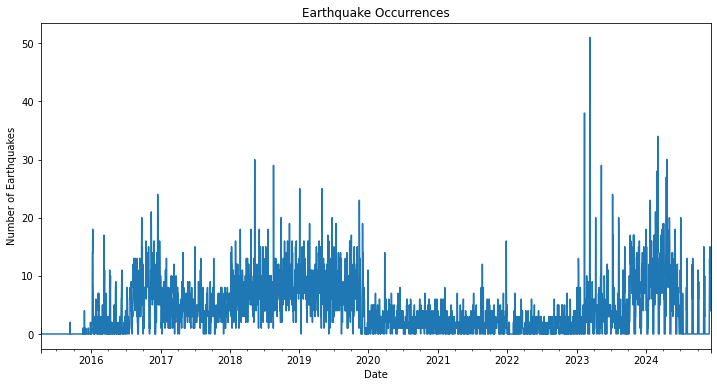

In [35]:
plt.figure(figsize=(12, 6))
EQ_df.set_index('Date').resample('D').size().plot()
plt.title('Earthquake Occurrences')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()

### Average Earth quake magnitudes

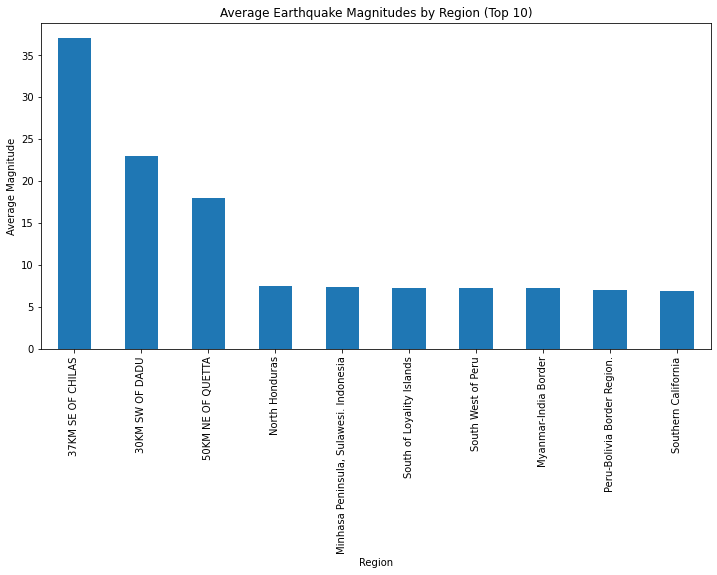

In [17]:
plt.figure(figsize=(12, 6))
region_magnitudes = EQ_df.groupby('Region')['Magnitude'].mean().sort_values(ascending=False).head(10)
region_magnitudes.plot(kind='bar')
plt.title('Average Earthquake Magnitudes by Region (Top 10)')
plt.xlabel('Region')
plt.ylabel('Average Magnitude')
plt.show()

### Depth vs Magnitude of Earth quake

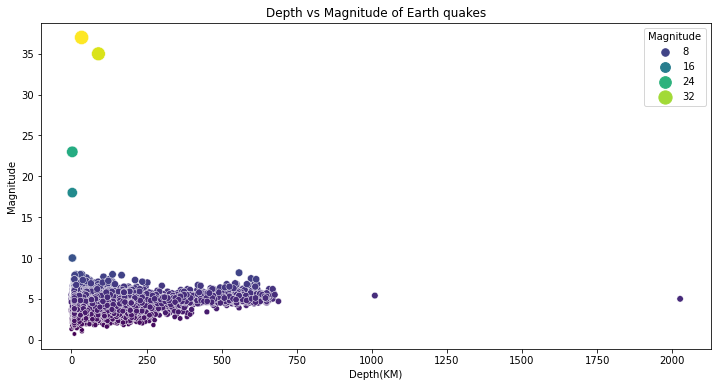

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(data  = EQ_df, x = 'Depth (km)', y = 'Magnitude', hue = 'Magnitude',palette='viridis', 
                size='Magnitude',sizes = (20,200))
plt.title('Depth vs Magnitude of Earth quakes')
plt.xlabel('Depth(KM)')
plt.ylabel('Magnitude')
plt.legend(title = 'Magnitude')
plt.show()

### Top 10 Region with highest and lowest average magnitude

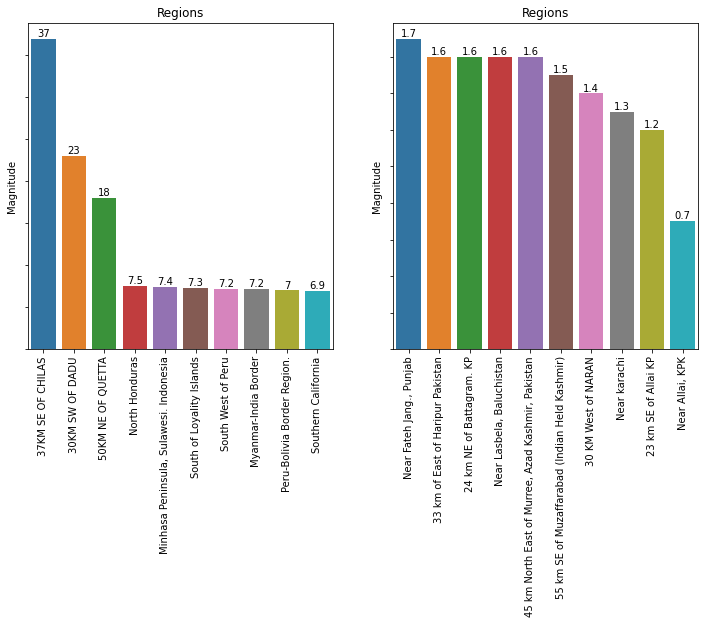

In [19]:
region_grouped = EQ_df.groupby("Region")
averge_magnitude = pd.DataFrame(region_grouped['Magnitude'].mean()).sort_values('Magnitude', ascending = False)


fig, axes = plt.subplots(ncols=2, figsize = (12,6))
sns.barplot(x = averge_magnitude.index[:10], y = averge_magnitude.iloc[:10,0], ax = axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)
axes[0].set_yticklabels(())
axes[0].set_xlabel("")
axes[0].set_title("Regions")


sns.barplot(x=averge_magnitude.index[-10:], y=averge_magnitude.iloc[-10:, 0], ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_yticklabels(())
axes[1].set_xlabel("")
axes[1].set_title("Regions")
plt.show()


### Earth quake Detection and Verification methods

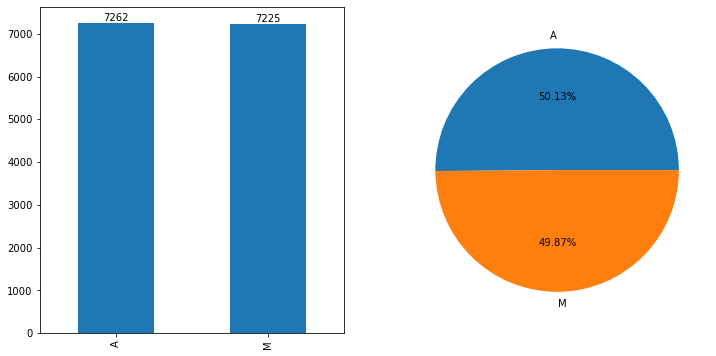

In [44]:
method_counts = EQ_df['Mode'].value_counts()
fig, axes =plt.subplots(ncols = 2, figsize = (12,6))

method_counts.plot(kind = 'bar', ax = axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

method_counts.plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_yticklabels(())
axes[1].set_xlabel("")
axes[1].set_ylabel("")
plt.show()

### Finding by which month highest number of Earth quake recorded

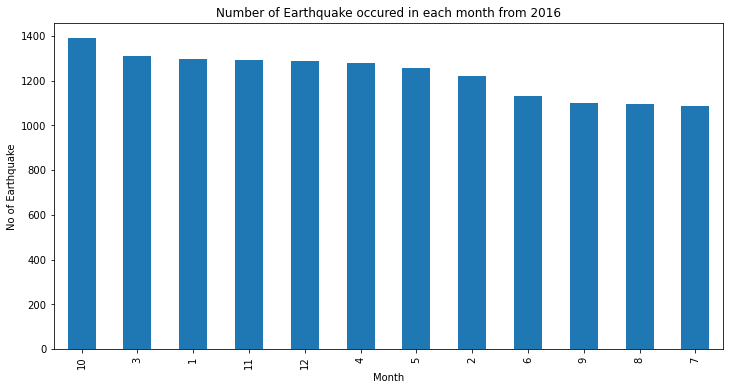

In [36]:
plt.figure(figsize=(12, 6))
month_count = EQ_df.groupby('Month')['Month'].count().sort_values(ascending=False)
month_count.plot(kind='bar')
plt.title('Number of Earthquake occured in each month from 2016')
plt.xlabel('Month')
plt.ylabel('No of Earthquake')
plt.show()

### Finding by which time period highest number of Earth quake recorded

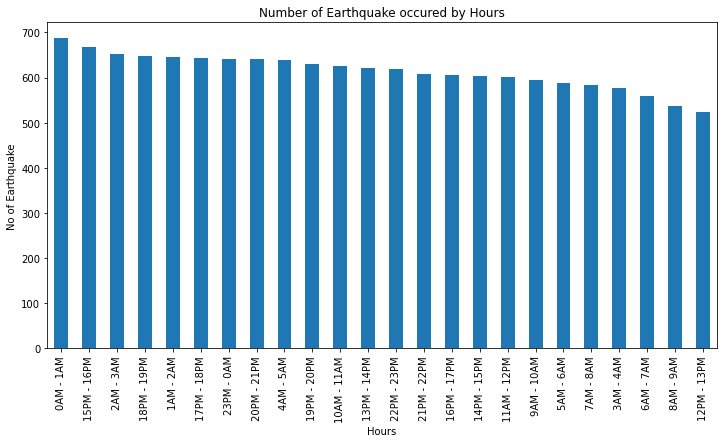

In [37]:
plt.figure(figsize=(12, 6))
month_count = EQ_df.groupby('hours')['hours'].count().sort_values(ascending=False)
month_count.plot(kind='bar')
plt.title('Number of Earthquake occured by Hours')
plt.xlabel('Hours')
plt.ylabel('No of Earthquake')
plt.show()

### Finding by which year highest number of Earth quake recorded

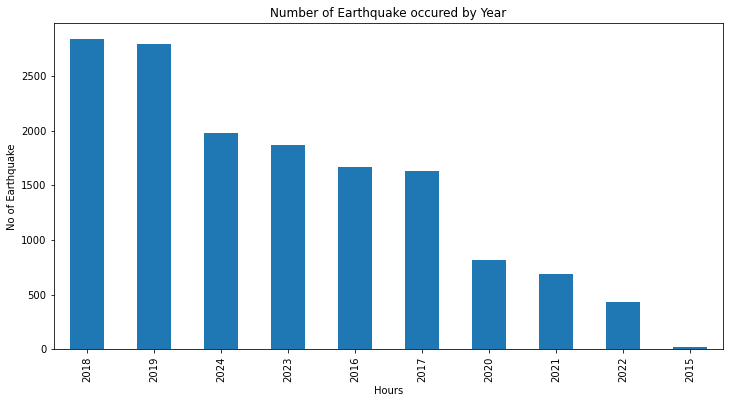

In [23]:
plt.figure(figsize=(12, 6))
month_count = EQ_df.groupby('Year')['Year'].count().sort_values(ascending=False)
month_count.plot(kind='bar')
plt.title('Number of Earthquake occured by Year')
plt.xlabel('Hours')
plt.ylabel('No of Earthquake')
plt.show()

# Finding country name

In [ ]:
# Using Geocode API for find the country using Region

row = 1
def location_finder(lat,lon):
    global row
    row = row + 1
    print(row)
    try:        
        response = requests.get(f'https://geocode.maps.co/reverse?lat={str(lat)}&lon={str(lon)}&api_key=API_KEY')
        res = response.json()
        try:
            return res['address']['country']
        except:
            return 'No country'
        except:
            return 'No country'
        

EQ_df['Country'] = np.vectorize(location_finder)(EQ_df['Latitude'],EQ_df['Longitude'])

In [49]:
# List of countries in the world

country_lst = ['Afghanistan','Albania','Algeria','Andorra','Angola','Antigua and Barbuda','Argentina','Armenia','Australia',
               'Austria','Azerbaijan','The Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Belize','Benin',
               'Bhutan','Bolivia','Bosnia and Herzegovina','Botswana','Brazil','Brunei','Bulgaria','Burkina Faso','Burundi',
               'Cabo Verde','Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','China','Colombia',
               'Comoros','Congo, Democratic Republic of the','Congo, Republic of the','Costa Rica','Côte d’Ivoire','Croatia',
               'Cuba','Cyprus','Czech Republic','Denmark','Djibouti','Dominica','Dominican Republic','East Timor',
               'Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Eswatini','Ethiopia','Fiji','Finland',
               'France','Gabon','The Gambia','Georgia','Germany','Ghana','Greece','Grenada','Guatemala','Guinea','Guinea-Bissau',
               'Guyana','Haiti','Honduras','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Israel','Italy',
               'Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati','North Korea','South Korea','Kosovo','Kuwait',
               'Kyrzstan','Laos','Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania','Luxembourg',
               'Madagascar','Malawi','Malaysia','Maldives','Mali','Malta','Marshall Islands','Mauritania','Mauritius','Mexico',
               'Micronesia, Federated States of','Moldova','Monaco','Mongolia','Montenegro','Morocco','Mozambique','Myanmar',
               'Namibia','Nauru','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria','North Macedonia','Norway',
               'Oman','Pakistan','Palau','Panama','Papua New Ginea','Paraguay','Peru','Philippine','Poland','Portugal','Qatar',
               'Romania','Russia','Rwanda','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Samoa',
               'San Marino','Sao Tome and Principe','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone','Singapore',
               'Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','Spain','Sri Lanka','Sudan','Sudan, South',
               'Suriname','Sweden','Switzerland','Syria','Tiwan','Tajikstan','Tanzania','Thailand','Togo','Tonga',
               'Trinidad and Tobago','Tunisia','Turkey','Turkmenistan','Tuvalu','Uganda','Ukraine','United Arab Emirates',
               'United Kingdom','United States','Uruguay','Uzebakistan','Vanuatu','Vatican City','Venezuela','Vietnam','Yemen',
               'Zambia','Zimbabwe','Kashmir','California','Alasaka','Mariana Island','Kuril Islands','XIZANG','XINJIANG']


In [50]:
country_lst_capital = [x.upper() for x in country_lst]
EQ_df['Region'] = EQ_df.Region.str.upper()
EQ_df['Country'] = EQ_df.Country.str.upper()

def country_from_region(country, region):
    if country == 'NO COUNTRY':
        for i in country_lst_capital:
            if i in region:
                return i
        return 'NO COUNTRY'
    else:
        return country
    
EQ_df['Country_from_region'] = np.vectorize(country_from_region)(EQ_df['Country'],EQ_df['Region'])

# Finding Earthquake count for the magnitude level

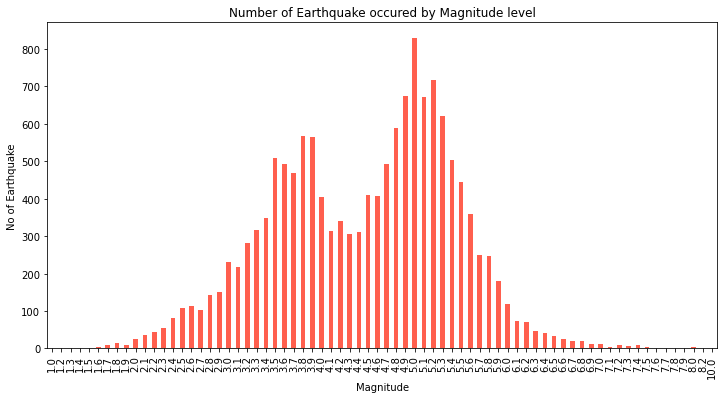

In [8]:
plt.figure(figsize=(12, 6))
# Filter data to exclude magnitudes outside the desired range
filtered_EQ_df = EQ_df[(EQ_df['Magnitude'] >= 1) & (EQ_df['Magnitude'] <= 10)]
magnitude_count = filtered_EQ_df['Magnitude'].value_counts().sort_index()
magnitude_count.plot(kind='bar', color = '#ff5f4e')
plt.title('Number of Earthquake occured by Magnitude level')
plt.xlabel('Magnitude')
plt.ylabel('No of Earthquake')
plt.show()

# Find Which country affected most by Earthquake

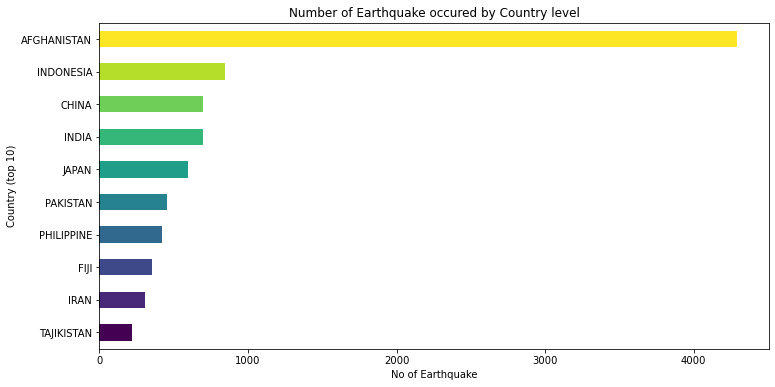

In [42]:
plt.figure(figsize=(12, 6))
# Filter data to exclude magnitudes outside the desired range
filtered_EQ_df = EQ_df[(EQ_df['Country'] != 'NO COUNTRY')]
magnitude_count = filtered_EQ_df['Country'].value_counts().nlargest(10).sort_values()
colors = cm.get_cmap('viridis', len(magnitude_count))
magnitude_count.plot(kind='barh', color=colors(np.arange(len(magnitude_count))))
plt.title('Number of Earthquake occured by Country level')
plt.xlabel('No of Earthquake')
plt.ylabel('Country (top 10)')
plt.show()

# Implementing Random forest to the model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Correlation for each attribute to another

<AxesSubplot:>

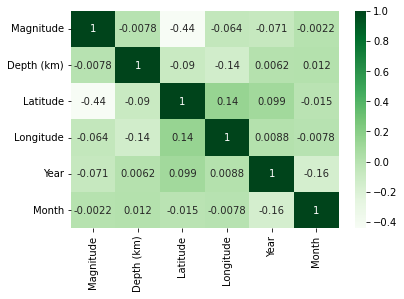

In [30]:
sns.heatmap(EQ_df.corr(), annot=True, cmap ='Greens')

# From the correlation map there is no attribute highly correlated to each so we can keep all the column

# Random Forest Regressor

In [49]:
## Selecting feature and target variable
x = EQ_df[['hours', 'Country', 'Depth (km)', 'Latitude', 'Longitude','Year','Month']]
y = EQ_df['Magnitude']

# preprocessing numberical feature
numeric_features = ['Depth (km)', 'Latitude', 'Longitude','Year','Month']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

# preprocessing categorical feature
categorical_features = ['hours', 'Country']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

# Create a pipeline that combines preprocessing and model(RandomForestRegressor)
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.1568391938378958
R^2 Score: 0.9216617676642551


In [ ]:
# Exporting dataset

EQ_df.to_csv(r'D:\vj\programing study material\my portfolio projects\Earth quake\Data set\final_EQ_Dataset_with_country.csv')